In [1]:
%matplotlib inline

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from cycsat.terrain import mpd, get_corners, floodFill
from cycsat.image import write_array

from osgeo import ogr, gdal, osr
from geopandas import gpd

In [2]:
# generate terrain
print('generate')
data = mpd(5,0)

# set up surface
x = range(data.shape[0])
y = range(data.shape[1])
X,Y = np.meshgrid(x,y)

generate


In [3]:
print('filling')
x,y = np.unravel_index(data.argmin(),data.shape)
mask = np.where(data < data.mean(),1,0)
flood = floodFill(x,y,mask)
write_array(flood,'test')
write_array(data,'data')

filling


In [4]:
ds = gdal.Open('test.tif')
band = ds.GetRasterBand(1)
drv = ogr.GetDriverByName("ESRI Shapefile")
srs = osr.SpatialReference()
srs.ImportFromWkt(ds.GetProjectionRef())
out = drv.CreateDataSource('test.shp')
out_layer = out.CreateLayer('new',srs=None)
fd = ogr.FieldDefn("DN",ogr.OFTInteger)
out_layer.CreateField(fd)
gdal.Polygonize(band,None,out_layer,0,[],callback=None)
out = None
gdf = gpd.read_file('test.shp')

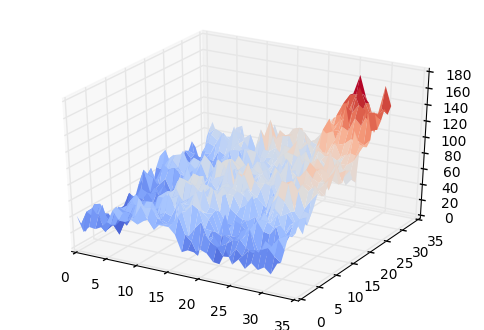

In [5]:
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(X, Y, data,cmap=cm.coolwarm,rstride=1, cstride=1,linewidth=0)

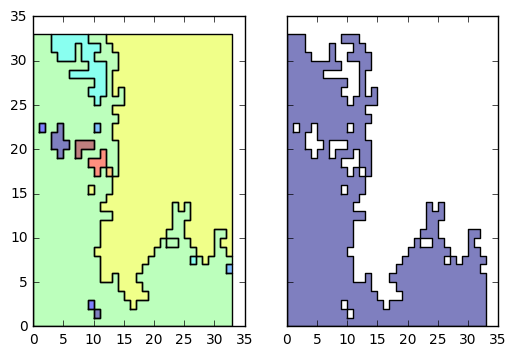

In [6]:
fig2, axes = plt.subplots(1,2,sharex=True,sharey=True)
ax2, ax3 = axes
gdf.plot(ax=ax2)

floodmap = gdf[gdf.DN==1]
largest = floodmap.area.sort_values(ascending=False).head(5).index
gdf.ix[largest].plot(ax=ax3,column='DN')

In [7]:
flood.max()

1